In [61]:
import os
from numpy import genfromtxt

directory = r'./data'
dance_data = [[] for x in range(0, 9)]

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        dance_move, _ = filename[:-4].split('_')
        dance_data[int(dance_move)].append(genfromtxt(os.path.join(directory, filename), delimiter=','))

In [80]:
print(genfromtxt('./data/1_1.csv', delimiter=','))

[[-0.92957049  0.95795506  0.40684234 ...  1.37470927 -0.41705489
  -0.80124632]
 [-0.93281458  0.96178847  0.41371376 ...  1.36547392 -0.41705489
  -0.81444133]
 [-0.93448336  0.9649074   0.42110408 ...  1.35458939 -0.41705489
  -0.82763635]
 ...
 [-0.79944627  1.22739259  0.58167832 ...  0.94889363 -0.41705489
  -0.7748563 ]
 [-0.79526767  1.23255875  0.5819928  ...  0.90601522 -0.41705489
  -0.78805131]
 [-0.79259763  1.23468842  0.57788882 ...  0.9350406  -0.39236228
  -0.78805131]]


In [83]:
x = genfromtxt('./data/1_1.csv', delimiter=',').flatten() + genfromtxt('./data/1_2.csv', delimiter=',').flatten()
print(x.shape)

(2400,)


In [77]:
data = []
import numpy as np

def process_batch(batch, window_size):
    result = []
    for i in range(0, len(batch), window_size):
        result.append(np.array(batch[i:i + window_size]).flatten())
    return result

for i in range(0, len(dance_data)):
    temp = []
    for batch in dance_data[i]:
        temp = temp + process_batch(batch, 10)
    data.append(temp)

In [63]:
print(data[0][0])

[-1.33796588  2.27826762 -1.10298321  0.81988941 -0.66613417  0.8567522
 -0.82267114  0.29870978  0.34886997  0.71998886 -0.67632737 -0.33942089
 -1.34263844  2.28115298 -1.09521552  0.81812778 -0.66258364  0.8567522
 -0.79670924  0.36531903  0.34144275  0.80244735 -0.68867368 -0.31303087
 -1.35444     2.28586573 -1.08379985  0.8170708  -0.65824409  0.8567522
 -0.79670924  0.41024155  0.34977024  0.86478597 -0.70101999 -0.29983586
 -1.36781688  2.29004263 -1.07147217  0.8170708  -0.65390455  0.8567522
 -0.79670924  0.46259952  0.34031741  0.84004842 -0.70101999 -0.31303087
 -1.38334314  2.29305165 -1.06205345  0.81777545 -0.64995951  0.8567522
 -0.79670924  0.44927767  0.31510988  0.75231259 -0.68867368 -0.32622588
 -1.39518475  2.29460425 -1.05917595  0.81883243 -0.64680348  0.8567522
 -0.79670924  0.34394211  0.29417863  0.68007896 -0.67632737 -0.36581092
 -1.40204675  2.29489278 -1.06438061  0.82059407 -0.64483096  0.8567522
 -0.79670924  0.23488882  0.26311935  0.64016905 -0.651634

In [64]:
import numpy as np
from keras.utils import to_categorical

x = []
y = []

for i in range(0, len(data)):
    for d in data[i]:
        x.append(d)
        y.append(i)
        
x = np.array(x)
y = to_categorical(np.array(y))
print(x.shape, y.shape)

(1620, 120) (1620, 9)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=33)

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Neural network
model = Sequential()
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.5, seed=3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'],)

In [71]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
21/21 [==============================] - 1s 19ms/step - loss: 1.9060 - accuracy: 0.3546 - val_loss: 0.3613 - val_accuracy: 0.9568
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 0.3373 - accuracy: 0.9428 - val_loss: 0.0682 - val_accuracy: 0.9907
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.1026 - accuracy: 0.9802 - val_loss: 0.0337 - val_accuracy: 0.9907
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0676 - accuracy: 0.9829 - val_loss: 0.0230 - val_accuracy: 0.9938
Epoch 5/100
21/21 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.9914 - val_loss: 0.0185 - val_accuracy: 0.9969
Epoch 6/100
21/21 [==============================] - 0s 20ms/step - loss: 0.0308 - accuracy: 0.9949 - val_loss: 0.0157 - val_accuracy: 0.9907
Epoch 7/100
21/21 [==============================] - 0s 10ms/step - loss: 0.0247 - accuracy: 0.9950 - val_loss: 0.0181 - val_accuracy: 0.9938
Epoch 8/1

21/21 [==============================] - 0s 9ms/step - loss: 8.4843e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9969
Epoch 59/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9969
Epoch 60/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.9990 - val_loss: 0.0069 - val_accuracy: 0.9969
Epoch 61/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 0.9959 - val_loss: 0.0042 - val_accuracy: 0.9969
Epoch 62/100
21/21 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9969
Epoch 63/100
21/21 [==============================] - 0s 8ms/step - loss: 7.8215e-04 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 64/100
21/21 [==============================] - 0s 12ms/step - loss: 9.2630e-04 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch

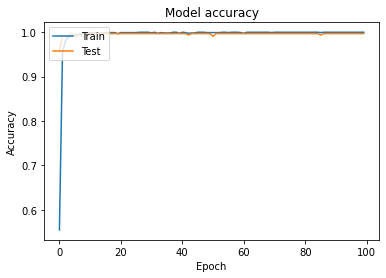

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

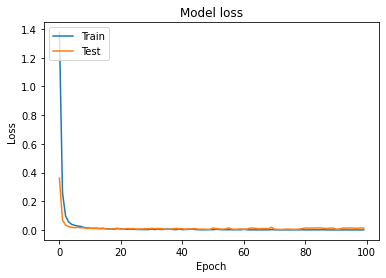

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [74]:
model.save('./model/model_9')

INFO:tensorflow:Assets written to: ./model/model_9/assets
